In [24]:
import warnings
warnings.filterwarnings("ignore")
import os
import nltk
from nltk.corpus import stopwords
import datetime
import time
import random
import string
import bs4 as bs
import urllib.request
import re
from urllib.request import Request, urlopen
 
#nltk.download('punkt')
import pandas as pd
from collections import Counter
 
#nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
 
from nltk import word_tokenize
#nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import heapq

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff

import itertools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from wordcloud import WordCloud,STOPWORDS

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import VotingClassifier,RandomForestClassifier

In [2]:
def preprocess(listtext):
    listtext=np.array(listtext,str).tolist()
    text=' '.join(listtext)
    stop_words = list(stopwords.words('english'))

    corpus = nltk.sent_tokenize(text)
    word_list = [word_tokenize(text) for text in corpus]
    corpus_lower = [token.lower() for token in corpus] # Lowercases the words.
    corpus_lower = [re.sub(r'\W',' ',token) for token in corpus_lower]  # Eliminates parentheses.
    corpus_lower = [re.sub(r'\s+',' ',token) for token in corpus_lower] # Eliminates double spaces.

    counter_word_list = []

    for sentence in corpus:
        tokens = nltk.word_tokenize(sentence)
        for token in tokens:
            counter_word_list.append(token)
    def remove_stopwords(corpus, stop_words):
        return [tokens for tokens in corpus if not tokens in stop_words]

    stopwords_removed =  [remove_stopwords(token, stop_words) for token in word_list]
    '''def remove_punctuations(stopwords_removed):
        return  [tokens for tokens in stopwords_removed if tokens.isalpha()]

    no_punct = [remove_punctuations(tokens) for tokens in stopwords_removed]'''
    def lower_case(tokens):
        return  [token.lower() for token in tokens]

    lower_tokens = [lower_case(tokens) for tokens in stopwords_removed]
    lemmatizer = WordNetLemmatizer()
    def get_lemma(lower_tokens):
        return  [lemmatizer.lemmatize(tokens) for tokens in lower_tokens]

    lemmatized_tokens = [get_lemma(tokens) for tokens in lower_tokens]
        
    return lemmatized_tokens


In [3]:
parent_dr=os.getcwd()
emojidr=os.path.join(parent_dr,"emoji")
hatedr=os.path.join(parent_dr,"hate")
offensivedr=os.path.join(parent_dr,"offensive")

In [4]:
emoji=os.listdir(emojidr)
hate=os.listdir(hatedr)
offensive=os.listdir(offensivedr)
offensive

['mapping.txt',
 'test_labels.txt',
 'test_text.txt',
 'train_labels.txt',
 'train_text.txt',
 'val_labels.txt',
 'val_text.txt']

In [5]:
%%capture
# Read train data
t1=pd.read_csv(emojidr+"\\"+emoji[4],error_bad_lines=False)
emjtr=t1.index.tolist()
f2=open(hatedr+"\\"+hate[4],encoding= 'unicode_escape')
t2=f2.read()
httr=t2.split("\n")
f3=open(offensivedr+"\\train_text.txt",encoding= 'unicode_escape')
t3=f3.read()
offtr=t3.split("\n")


emjtr=preprocess(emjtr)
httr=preprocess(httr)
offtr=preprocess(offtr)

trall=[emjtr,httr,offtr]
trlbl=["Emoji","Hate","Offensive"]
trtyp=[]
for i in range(len(trall)):
    for k in range(len(trall[i])):
        trtyp.append(trlbl[i])
trall=emjtr+httr+offtr
train=pd.DataFrame({"Text":trall,"Class":trtyp})
train=train.sample(n=len(train), random_state=11)
train=train.reset_index(drop=True)
train=train.fillna("No Texts")

In [6]:
cols=[]
for x in range(len(train.Text)):
    cols.append(' '.join(train.Text[x]))
train=train.drop('Text',axis=1)
train['Text']=cols
print(train.Class.value_counts())
train.head()         

Emoji        21228
Offensive    18118
Hate          8498
Name: Class, dtype: int64


,Class,Text
0,Offensive,âassault weaponsâ banned .
1,Offensive,@ user @ user it thirty year ago supposedly ke...
2,Hate,# buildthatwall stop the illegal invasion !
3,Offensive,no n't support gun control .
4,Emoji,charge board get ready weekend !


In [7]:
%%capture
# Read test data
t1=pd.read_csv(emojidr+"\\"+emoji[2],error_bad_lines=False)
emjts=t1.iloc[0].tolist()
f2=open(hatedr+"\\"+hate[2],encoding= 'unicode_escape')
t2=f2.read()
htts=t2.split("\n")
f3=open(offensivedr+"\\"+offensive[2],encoding= 'unicode_escape')
t3=f3.read()
offts=t3.split("\n")

emjts=preprocess(emjts)
htts=preprocess(htts)
offts=preprocess(offts)

tsall=[emjts,htts,offts]
tslbl=["Offensive","Hate","Emoji"]
tstyp=[]
for i in range(len(tsall)):
    for k in range(len(tsall[i])):
        tstyp.append(tslbl[i])
tsall=emjts+htts+offts
test=pd.DataFrame({"Text":tsall,"Class":tstyp})
test=test.sample(n=len(test), random_state=25)
test=test.reset_index(drop=True)
test=test.fillna("No Texts")

In [8]:
cols=[]
for x in range(len(test.Text)):
    cols.append(' '.join(test.Text[x]))
test=test.drop('Text',axis=1)
test['Text']=cols
test.head()

,Class,Text
0,Hate,`` only whore n't wear veil '' - religion lurv...
1,Emoji,ðâï¸ðð # scorpio 's sure committed...
2,Emoji,i think .
3,Emoji,he shill candidate fronted dastardly duo .
4,Emoji,if interested attending natasha 's improv work...


In [9]:
%%capture
# Read validation data
t1=pd.read_csv(emojidr+"\\"+emoji[-1],error_bad_lines=False)
emjvl=t1.index.tolist()
f2=open(hatedr+"\\"+hate[-1],encoding= 'unicode_escape')
t2=f2.read()
htvl=t2.split("\n")
f3=open(offensivedr+"\\"+offensive[-1],encoding= 'unicode_escape')
t3=f3.read()
offvl=t3.split("\n")

f2=open(hatedr+"\\"+hate[4],encoding= 'unicode_escape')
t2=f2.read()
htvl=t2.split("\n")
f3=open(offensivedr+"\\"+offensive[4],encoding= 'unicode_escape')
t3=f3.read()
offvl=t3.split("\n")

emjvl=preprocess(emjvl)
htvl=preprocess(htvl)
offvl=preprocess(offvl)

vlall=[emjvl,htvl,offvl]
vllbl=["Offensive","Hate","Emoji"]
vltyp=[]
for i in range(len(vlall)):
    for k in range(len(vlall[i])):
        vltyp.append(vllbl[i])
vlall=emjvl+htvl+offvl
valid=pd.DataFrame({"Text":vlall,"Class":vltyp})
valid=valid.sample(n=len(valid), random_state=5)
valid=valid.reset_index(drop=True)
valid=valid.fillna("No Texts")

In [10]:
cols=[]
for x in range(len(valid.Text)):
    cols.append(' '.join(valid.Text[x]))
valid=valid.drop('Text',axis=1)
valid['Text']=cols
valid.head()

,Class,Text
0,Emoji,donât let senate door hit behind way .
1,Offensive,at least 's i know.… our video @ user finally ...
2,Emoji,@ user @ user actually caused tragedy failure ...
3,Offensive,@ tour 18 golf course dallas happy happy happy...
4,Hate,"not violation state law , merely posting polic..."


In [11]:
dfs = [train,test,valid]
tweetall = pd.concat(dfs,axis=0)
print(len(tweetall))
print(len(train))
print(len(test))
print(len(valid))
tweetall.head()

80714
47844
4281
28589


,Class,Text
0,Offensive,âassault weaponsâ banned .
1,Offensive,@ user @ user it thirty year ago supposedly ke...
2,Hate,# buildthatwall stop the illegal invasion !
3,Offensive,no n't support gun control .
4,Emoji,charge board get ready weekend !


Emoji        40560
Offensive    20093
Hate         20061
Name: Class, dtype: int64


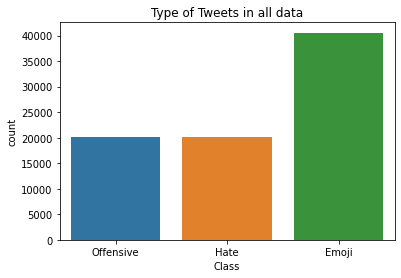

In [38]:
print(tweetall['Class'].value_counts())
plt.title("Type of Tweets in all data")
sns.countplot(tweetall['Class'])
plt.show()

Emoji        21228
Offensive    18118
Hate          8498
Name: Class, dtype: int64


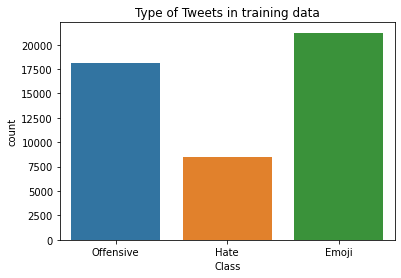

In [39]:
print(train['Class'].value_counts())
plt.title("Type of Tweets in training data")
sns.countplot(train['Class'])
plt.show()

Emoji        18118
Hate          8498
Offensive     1973
Name: Class, dtype: int64


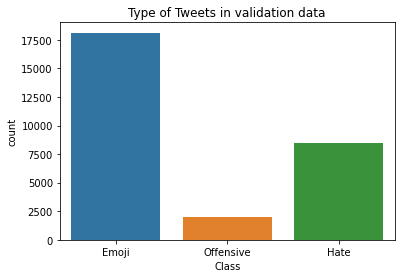

In [40]:
print(valid['Class'].value_counts())
plt.title("Type of Tweets in validation data")
sns.countplot(valid['Class'])
plt.show()

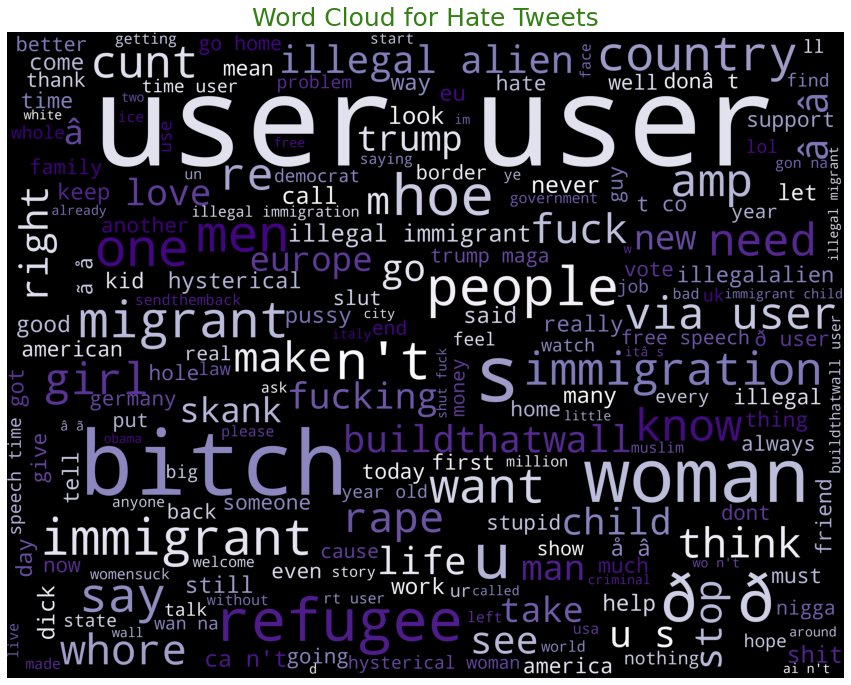

In [12]:
# Word Cloud for Hate Speech
txt1=np.array(tweetall[tweetall['Class']=='Hate']['Text'].tolist(),str)
positive_words = ' '.join(txt1)
cleaned = " ".join([word for word in positive_words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])
wordcloud = WordCloud(stopwords=STOPWORDS,colormap='Purples_r',width=3500,height=2700).generate(cleaned)

plt.figure(figsize=(15, 15))
plt.title("Word Cloud for Hate Tweets",fontsize=25,color="#348017")
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

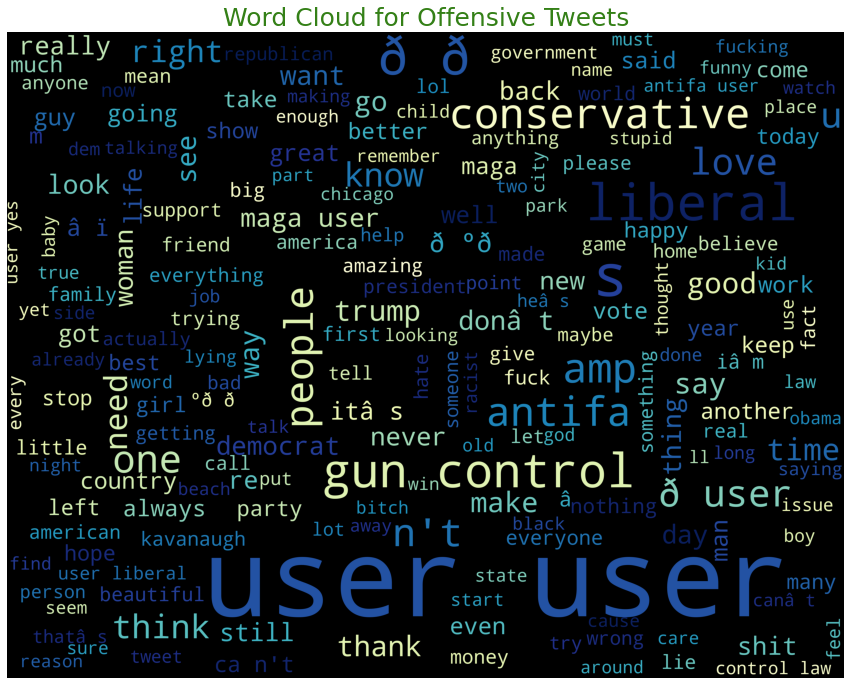

In [13]:
# Word Cloud for Offensive Speech
txt1=np.array(tweetall[tweetall['Class']=='Offensive']['Text'].tolist(),str)
positive_words = ' '.join(txt1)
cleaned = " ".join([word for word in positive_words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])
wordcloud = WordCloud(stopwords=STOPWORDS,colormap='YlGnBu_r',width=3500,height=2700).generate(cleaned)

plt.figure(figsize=(15, 15))
plt.title("Word Cloud for Offensive Tweets",fontsize=25,color="#348017")
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [14]:
x_train,x_test,y_train,y_test=train_test_split(train['Text'], train['Class'], test_size=0.2, random_state=12)

Accuracy: 83.67%
              precision    recall  f1-score   support

       Emoji       0.83      0.93      0.88      4156
        Hate       0.92      0.62      0.74      1732
   Offensive       0.82      0.83      0.82      3681

    accuracy                           0.84      9569
   macro avg       0.86      0.80      0.82      9569
weighted avg       0.84      0.84      0.83      9569



Predicted,Emoji,Hate,Offensive
True,,,
Emoji,3871,17,268
Hate,244,1081,407
Offensive,552,75,3054


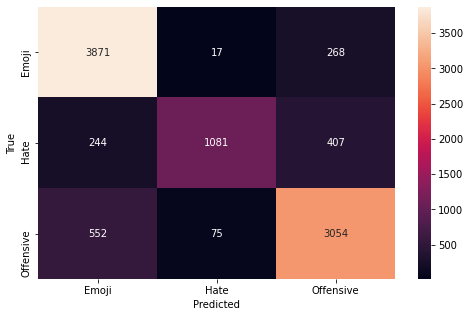

In [15]:
tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)
tfidf_train=tfidf_vectorizer.fit_transform(x_train) 
tfidf_test=tfidf_vectorizer.transform(x_test)

sgd=SGDClassifier(random_state=0)
sgd = sgd.fit(tfidf_train,y_train)
predsgd = sgd.predict(tfidf_test)
scoresgd=accuracy_score(y_test,predsgd)
plt.figure(figsize=(8,5))
print(f'Accuracy: {round(scoresgd*100,2)}%')
c1=pd.crosstab(y_test, predsgd, rownames=['True'], colnames=['Predicted'], margins=True)
sns.heatmap(c1.iloc[:3,:3],fmt="d",annot=True)
print(classification_report(y_test,predsgd))
c1.iloc[:3,:3]

Accuracy: 76.03%
              precision    recall  f1-score   support

       Emoji       0.98      0.71      0.82      4156
        Hate       0.96      0.42      0.58      1732
   Offensive       0.62      0.98      0.76      3681

    accuracy                           0.76      9569
   macro avg       0.85      0.70      0.72      9569
weighted avg       0.84      0.76      0.75      9569



Predicted,Emoji,Hate,Offensive
True,,,
Emoji,2935,3,1218
Hate,23,719,990
Offensive,33,27,3621


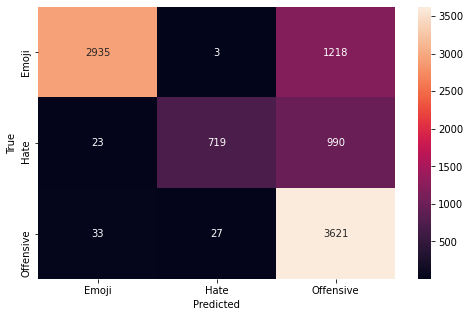

In [16]:
tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)
tfidf_train=tfidf_vectorizer.fit_transform(x_train) 
tfidf_test=tfidf_vectorizer.transform(x_test)
G_NB = BernoulliNB()
G_NB.fit(tfidf_train, y_train)
prednb=G_NB.predict(tfidf_test)
scorenb=accuracy_score(y_test,prednb)
plt.figure(figsize=(8,5))
print(f'Accuracy: {round(scorenb*100,2)}%')
c2=pd.crosstab(y_test, prednb, rownames=['True'], colnames=['Predicted'], margins=True)
sns.heatmap(c2.iloc[:3,:3],fmt="d",annot=True)
print(classification_report(y_test,prednb))
c2.iloc[:3,:3]

Accuracy: 74.29%
              precision    recall  f1-score   support

       Emoji       0.84      0.79      0.82      4156
        Hate       0.60      0.59      0.60      1732
   Offensive       0.70      0.76      0.73      3681

    accuracy                           0.74      9569
   macro avg       0.72      0.71      0.71      9569
weighted avg       0.75      0.74      0.74      9569



Predicted,Emoji,Hate,Offensive
True,,,
Emoji,3302,231,623
Hate,153,1026,553
Offensive,457,443,2781


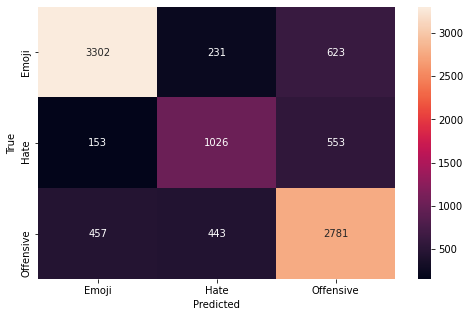

In [17]:
svc = make_pipeline(StandardScaler(with_mean=False), LinearSVC(random_state=0, tol=1e-5))
train_norm = preprocessing.normalize(tfidf_train)
test_norm = preprocessing.normalize(tfidf_test)
svc.fit(train_norm, y_train)
predsvc=svc.predict(test_norm)
scoresvc=accuracy_score(y_test,predsvc)
plt.figure(figsize=(8,5))
print(f'Accuracy: {round(scoresvc*100,2)}%')
c3=pd.crosstab(y_test, predsvc, rownames=['True'], colnames=['Predicted'], margins=True)
sns.heatmap(c3.iloc[:3,:3],fmt="d",annot=True)
print(classification_report(y_test,predsvc))
c3.iloc[:3,:3]

Accuracy: 82.55%
              precision    recall  f1-score   support

       Emoji       0.88      0.86      0.87      4156
        Hate       0.94      0.57      0.71      1732
   Offensive       0.75      0.90      0.82      3681

    accuracy                           0.83      9569
   macro avg       0.86      0.78      0.80      9569
weighted avg       0.84      0.83      0.82      9569



Predicted,Emoji,Hate,Offensive
True,,,
Emoji,3590,11,555
Hate,164,987,581
Offensive,309,50,3322


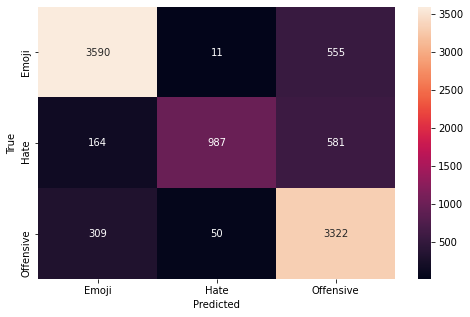

In [20]:
vt= VotingClassifier(estimators=[('sgd', sgd), ('nb', G_NB), ('svc', svc)], voting='hard')
#train_norm1 = preprocessing.normalize(tfidf_train)
#test_norm1 = preprocessing.normalize(tfidf_test)
vt.fit(tfidf_train, y_train)
predvt=vt.predict(tfidf_test)
scorevt=accuracy_score(y_test,predvt)
plt.figure(figsize=(8,5))
print(f'Accuracy: {round(scorevt*100,2)}%')
c4=pd.crosstab(y_test, predvt, rownames=['True'], colnames=['Predicted'], margins=True)
sns.heatmap(c4.iloc[:3,:3],fmt="d",annot=True)
print(classification_report(y_test,predvt))
c4.iloc[:3,:3]

Accuracy: 83.56%
              precision    recall  f1-score   support

       Emoji       0.86      0.90      0.88      4156
        Hate       0.90      0.63      0.74      1732
   Offensive       0.79      0.86      0.83      3681

    accuracy                           0.84      9569
   macro avg       0.85      0.80      0.81      9569
weighted avg       0.84      0.84      0.83      9569



Predicted,Emoji,Hate,Offensive
True,,,
Emoji,3730,28,398
Hate,201,1093,438
Offensive,416,92,3173


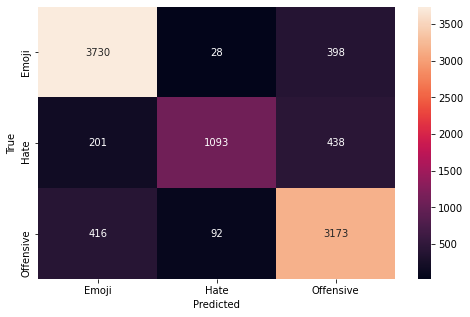

In [25]:
rf = RandomForestClassifier(n_estimators=50, random_state=1)
vt1= VotingClassifier(estimators=[('sgd', sgd), ('rf', rf),('svc', svc)], voting='hard')
train_norm1 = preprocessing.normalize(tfidf_train)
test_norm1 = preprocessing.normalize(tfidf_test)
vt1.fit(train_norm1, y_train)
predvt1=vt1.predict(test_norm1)
scorevt1=accuracy_score(y_test,predvt1)
plt.figure(figsize=(8,5))
print(f'Accuracy: {round(scorevt1*100,2)}%')
c5=pd.crosstab(y_test, predvt1, rownames=['True'], colnames=['Predicted'], margins=True)
sns.heatmap(c5.iloc[:3,:3],fmt="d",annot=True)
print(classification_report(y_test,predvt1))
c5.iloc[:3,:3]

Accuracy: 78.82%
              precision    recall  f1-score   support

       Emoji       0.80      0.91      0.85      4156
        Hate       0.69      0.70      0.69      1732
   Offensive       0.82      0.69      0.75      3681

    accuracy                           0.79      9569
   macro avg       0.77      0.77      0.77      9569
weighted avg       0.79      0.79      0.79      9569



Predicted,Emoji,Hate,Offensive
True,,,
Emoji,3786,100,270
Hate,248,1204,280
Offensive,684,445,2552


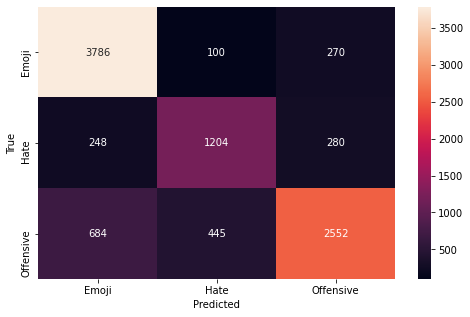

In [26]:
rf = RandomForestClassifier(n_estimators=50, random_state=1)
vt2= VotingClassifier(estimators=[('rf', rf),('svc', svc)], voting='hard')
train_norm1 = preprocessing.normalize(tfidf_train)
test_norm1 = preprocessing.normalize(tfidf_test)
vt2.fit(train_norm1, y_train)
predvt2=vt2.predict(test_norm1)
scorevt2=accuracy_score(y_test,predvt2)
plt.figure(figsize=(8,5))
print(f'Accuracy: {round(scorevt2*100,2)}%')
c6=pd.crosstab(y_test, predvt2, rownames=['True'], colnames=['Predicted'], margins=True)
sns.heatmap(c6.iloc[:3,:3],fmt="d",annot=True)
print(classification_report(y_test,predvt2))
c6.iloc[:3,:3]